In [1]:
from connec_functions import execute_to_df, generate_sparql
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

## Data system users

In [19]:
datasys_users = execute_to_df("data-system-users.sparql")
datasys_users

,source_graph,datasystem_user,predicate_name,value,affiliation_id
0,urn:lwua:INGEST:/data/2-mailinglist_lifewatch....,http://lifewatch-user-analysis-2023/user/59848...,NA,NA,NaN
1,urn:lwua:INGEST:/data/2-mailinglist_lifewatch....,http://lifewatch-user-analysis-2023/user/ef667...,NA,NA,https://marineinfo.org/id/institute/5443
2,urn:lwua:INGEST:/data/2-mailinglist_lifewatch....,http://lifewatch-user-analysis-2023/user/2715d...,NA,NA,https://marineinfo.org/id/institute/36
3,urn:lwua:INGEST:/data/2-mailinglist_lifewatch....,http://lifewatch-user-analysis-2023/user/2ac53...,NA,NA,https://marineinfo.org/id/institute/5271
4,urn:lwua:INGEST:/data/2-mailinglist_lifewatch....,http://lifewatch-user-analysis-2023/user/c11b7...,NA,NA,https://marineinfo.org/id/institute/1883
...,...,...,...,...,...
3120,urn:lwua:INGEST:/data/1-marinespecies.org_user...,http://lifewatch-user-analysis-2023/user/6f02d...,NA,NA,https://marineinfo.org/id/institute/11268
3121,urn:lwua:INGEST:/data/1-marinespecies.org_user...,http://lifewatch-user-analysis-2023/user/fc7da...,NA,NA,https://marineinfo.org/id/institute/1933
3122,urn:lwua:INGEST:/data/1-marinespecies.org_user...,http://lifewatch-user-analysis-2023/user/85190...,NA,NA,http://lifewatch-user-analysis-2023/affiliatio...
3123,urn:lwua:INGEST:/data/1-marinespecies.org_user...,http://lifewatch-user-analysis-2023/user/e961e...,NA,NA,https://marineinfo.org/id/institute/4592


In [7]:
#overview summary
datasys_users.groupby("source_graph").describe()

datasystem_user         \
                                                             count unique   
source_graph                                                                
urn:lwua:INGEST:/data/1-marinespecies.org_users...             522    522   
urn:lwua:INGEST:/data/2-mailinglist_lifewatch.b...             203    203   
urn:lwua:INGEST:/data/3-users_lifewatch_by_grou...            2400   2399   

                                                                                                       \
                                                                                                  top   
source_graph                                                                                            
urn:lwua:INGEST:/data/1-marinespecies.org_users...  http://lifewatch-user-analysis-2023/user/4e8a3...   
urn:lwua:INGEST:/data/2-mailinglist_lifewatch.b...  http://lifewatch-user-analysis-2023/user/59848...   
urn:lwua:INGEST:/data/3-users_lifewatch_by_grou...  http://lifewatch-user-analysis-2023/user/5ce75...   

                                                        affiliation_id         \
                                                   freq          count unique   
source_graph                                                                    
urn:lwua:INGEST:/data/1-marinespecies.org_users...    1            522    312   
urn:lwua:INGEST:/data/2-mailinglist_lifewatch.b...    1            193     39   
urn:lwua:INGEST:/data/3-users_lifewatch_by_grou...    2           1987    438   

                                                                                                       \
                                                                                                  top   
source_graph                                                                                            
urn:lwua:INGEST:/data/1-marinespecies.org_users...                http://lifewatch-user-analysis-2023   
urn:lwua:INGEST:/data/2-mailinglist_lifewatch.b...             https://marineinfo.org/id/institute/36   
urn:lwua:INGEST:/data/3-users_lifewatch_by_grou...  http://lifewatch-user-analysis-2023/affiliatio...   

                                                         
                                                   freq  
source_graph                                             
urn:lwua:INGEST:/data/1-marinespecies.org_users...  143  
urn:lwua:INGEST:/data/2-mailinglist_lifewatch.b...   47  
urn:lwua:INGEST:/data/3-users_lifewatch_by_grou...  802

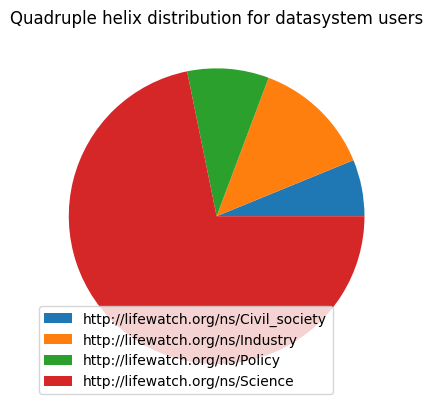

In [27]:
# distribution of Quadruple Helix
datasys_users_qh = datasys_users.groupby(['qh']).nunique()

plt.pie(datasys_users_qh['affiliation_id'])
plt.legend(labels=datasys_users_qh.index)
plt.title("Quadruple helix distribution for datasystem users")
plt.show()

In [ ]:
# horizontal barplot of affiliation country count, from datasystem users
dsusers_per_country_fig = datasys_users['country'].value_counts().plot.barh(title = "Datasystem users",ylabel="country", xlabel="user count")

In [ ]:
# table of unique datasystem users grouped per type of affiliation and quadruple helix group  
# datasys_users.groupby(['qh','group']).nunique()

## Publications

### Number of publications

In [41]:
# publications from the LifeWatch special collections 
publications = execute_to_df("publication.sparql")

In [42]:
# manipulate date datatype
publications['publish_date'] = pd.to_datetime(publications['publish_date'])
publications['publish_date_year'] = publications['publish_date'].dt.year

# assess publications with missing publish_date
pubs_with_missing_publishdate = len(publications[publications['publish_date_year'].isnull()])
print(f'number of publiations with missing publish date: {pubs_with_missing_publishdate}')

# replace all NaN values with zeros & convert from float to int
publications['publish_date_year'] = publications['publish_date_year'].fillna(0).astype(int)

number of publiations with missing publish date: 12


### Number of publications per publish-year

In [43]:
# setting & selecting date range for analysis 
START_YEAR = 2012
END_YEAR = 2024
pubs_per_publishyear_range = publications[ (publications['publish_date_year'] >= START_YEAR) & (publications['publish_date_year'] <= END_YEAR) ]

In [44]:
# calculate number & cummulative number of publication per publish year 
pubs_per_publishyear_range = pubs_per_publishyear_range.groupby('publish_date_year').count()
pubs_per_publishyear_range['publication_url_cumsum'] = pubs_per_publishyear_range['publication_url'].cumsum(skipna=False)

In [45]:
# Table
pubs_per_publishyear_range.rename(columns={'publication_url': 'count', 'publication_url_cumsum': 'cummulative count'}, inplace=True)
pubs_per_publishyear_range = pubs_per_publishyear_range.rename_axis('Year')

pubs_per_publishyear_range[['count','cummulative count']]

,count,cummulative count
Year,,
2012,113,113
2013,25,138
2014,145,283
2015,484,767
2016,35,802
2017,13,815
2018,28,843
2019,27,870
2020,1,871


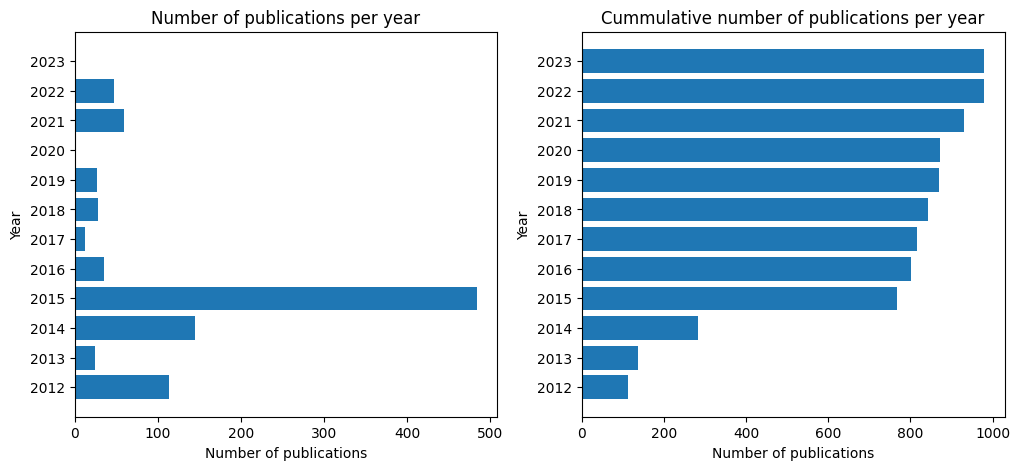

In [24]:
# Horizontal barplot of number of publiations per publish year
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].barh(pubs_per_publishyear_range.index.astype(str), pubs_per_publishyear_range['publication_url'])
ax[0].set_title('Number of publications per year')
ax[0].set_xlabel('Number of publications')
ax[0].set_ylabel('Year')

ax[1].barh(pubs_per_publishyear_range.index.astype(str), pubs_per_publishyear_range['publication_url_cumsum'])
ax[1].set_title('Cummulative number of publications per year')
ax[1].set_xlabel('Number of publications')
ax[1].set_ylabel('Year')

plt.show()

### First author affiliations

In [68]:
publication_authors = execute_to_df("publication-authors.sparql")

In [69]:
publication_authors

,identifier,author,auth_id,auth_firstname,auth_lastname,auth_affil
0,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7343-b2,NaN,NaN,NaN,NaN
1,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7343-b1,NaN,NaN,NaN,NaN
2,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7350-b0,http://dev.marineinfo.org/id/person/41087,Rahul,Kumar,http://dev.marineinfo.org/id/institute/2243
3,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7357-b2,NaN,NaN,NaN,NaN
4,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7357-b1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
23435,http://dev.marineinfo.org/id/publication/351092,genid-ddcdbe7c14694e3b89899f62b743e01824-b0,NaN,NaN,NaN,NaN
23436,http://dev.marineinfo.org/id/publication/351092,genid-ddcdbe7c14694e3b89899f62b743e01831-b0,NaN,NaN,NaN,NaN
23437,http://dev.marineinfo.org/id/publication/351092,genid-218ce70aa6814f48a9f8bb85a4a82c3938-b0,NaN,NaN,NaN,NaN
23438,http://dev.marineinfo.org/id/publication/351092,genid-218ce70aa6814f48a9f8bb85a4a82c3945-b0,NaN,NaN,NaN,NaN


In [70]:
publication_authors[ publication_authors['identifier'] == "http://dev.marineinfo.org/id/publication/352515"] 
#sparql query returns 105 author blank nodes while corresponding ttl-file lists only three authors

,identifier,author,auth_id,auth_firstname,auth_lastname,auth_affil
0,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7343-b2,NaN,NaN,NaN,NaN
1,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7343-b1,NaN,NaN,NaN,NaN
2,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7350-b0,http://dev.marineinfo.org/id/person/41087,Rahul,Kumar,http://dev.marineinfo.org/id/institute/2243
3,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7357-b2,NaN,NaN,NaN,NaN
4,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7357-b1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
100,http://dev.marineinfo.org/id/publication/352515,genid-218ce70aa6814f48a9f8bb85a4a82c39173-b2,http://dev.marineinfo.org/id/person/30605,Wim,De Waele,http://dev.marineinfo.org/id/institute/2243
101,http://dev.marineinfo.org/id/publication/352515,genid-218ce70aa6814f48a9f8bb85a4a82c39180-b0,NaN,NaN,NaN,NaN
102,http://dev.marineinfo.org/id/publication/352515,genid-218ce70aa6814f48a9f8bb85a4a82c39193-b1,NaN,NaN,NaN,NaN
103,http://dev.marineinfo.org/id/publication/352515,genid-218ce70aa6814f48a9f8bb85a4a82c39193-b2,http://dev.marineinfo.org/id/person/30605,Wim,De Waele,http://dev.marineinfo.org/id/institute/2243


In [81]:
single_pub = publication_authors[ (publication_authors['identifier'] == "http://dev.marineinfo.org/id/publication/352515")] 
single_pub

,identifier,author,auth_id,auth_firstname,auth_lastname,auth_affil
0,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7343-b2,NaN,NaN,NaN,NaN
1,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7343-b1,NaN,NaN,NaN,NaN
2,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7350-b0,http://dev.marineinfo.org/id/person/41087,Rahul,Kumar,http://dev.marineinfo.org/id/institute/2243
3,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7357-b2,NaN,NaN,NaN,NaN
4,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7357-b1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
100,http://dev.marineinfo.org/id/publication/352515,genid-218ce70aa6814f48a9f8bb85a4a82c39173-b2,http://dev.marineinfo.org/id/person/30605,Wim,De Waele,http://dev.marineinfo.org/id/institute/2243
101,http://dev.marineinfo.org/id/publication/352515,genid-218ce70aa6814f48a9f8bb85a4a82c39180-b0,NaN,NaN,NaN,NaN
102,http://dev.marineinfo.org/id/publication/352515,genid-218ce70aa6814f48a9f8bb85a4a82c39193-b1,NaN,NaN,NaN,NaN
103,http://dev.marineinfo.org/id/publication/352515,genid-218ce70aa6814f48a9f8bb85a4a82c39193-b2,http://dev.marineinfo.org/id/person/30605,Wim,De Waele,http://dev.marineinfo.org/id/institute/2243


In [85]:
single_pub[single_pub['auth_id'].notna()]

,identifier,author,auth_id,auth_firstname,auth_lastname,auth_affil
2,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7350-b0,http://dev.marineinfo.org/id/person/41087,Rahul,Kumar,http://dev.marineinfo.org/id/institute/2243
5,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7364-b0,http://dev.marineinfo.org/id/person/41087,Rahul,Kumar,http://dev.marineinfo.org/id/institute/2243
8,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7378-b0,http://dev.marineinfo.org/id/person/41087,Rahul,Kumar,http://dev.marineinfo.org/id/institute/2243
11,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7392-b0,http://dev.marineinfo.org/id/person/41087,Rahul,Kumar,http://dev.marineinfo.org/id/institute/2243
14,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7406-b0,http://dev.marineinfo.org/id/person/41087,Rahul,Kumar,http://dev.marineinfo.org/id/institute/2243
17,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7426-b0,http://dev.marineinfo.org/id/person/41087,Rahul,Kumar,http://dev.marineinfo.org/id/institute/2243
20,http://dev.marineinfo.org/id/publication/352515,genid-2072cdb6b3d5487d80142e4e44b064ab7440-b0,http://dev.marineinfo.org/id/person/41087,Rahul,Kumar,http://dev.marineinfo.org/id/institute/2243
22,http://dev.marineinfo.org/id/publication/352515,genid-a53f375aea0241b2af384fea21ffa2f161-b1,http://dev.marineinfo.org/id/person/41088,Pankaj,Jaiswal,http://dev.marineinfo.org/id/institute/2243
25,http://dev.marineinfo.org/id/publication/352515,genid-a53f375aea0241b2af384fea21ffa2f175-b1,http://dev.marineinfo.org/id/person/41088,Pankaj,Jaiswal,http://dev.marineinfo.org/id/institute/2243
28,http://dev.marineinfo.org/id/publication/352515,genid-a53f375aea0241b2af384fea21ffa2f189-b1,http://dev.marineinfo.org/id/person/41088,Pankaj,Jaiswal,http://dev.marineinfo.org/id/institute/2243


In [ ]:
# horizontal histogram graph of number of publications per country 


# table of first author affiliations per quadruple helix category


### Relevance to Sustainable Development Goals (SDG's)

In [ ]:
execute_to_df("organization.sparql")